In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/student-por.csv', sep=';')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
for col, d in zip(df.columns, df.dtypes):
    if d == 'O':
        print(col)
        print(df[col].value_counts())
        print('\n\n')

school
GP    423
MS    226
Name: school, dtype: int64



sex
F    383
M    266
Name: sex, dtype: int64



address
U    452
R    197
Name: address, dtype: int64



famsize
GT3    457
LE3    192
Name: famsize, dtype: int64



Pstatus
T    569
A     80
Name: Pstatus, dtype: int64



Mjob
other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64



Fjob
other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64



reason
course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64



guardian
mother    455
father    153
other      41
Name: guardian, dtype: int64



schoolsup
no     581
yes     68
Name: schoolsup, dtype: int64



famsup
yes    398
no     251
Name: famsup, dtype: int64



paid
no     610
yes     39
Name: paid, dtype: int64



activities
no     334
yes    315
Name: activities, dtype: int64



nursery
yes    521
no     128
Name: nursery, dtype: int

In [5]:
binary_columns = {'romantic':{'yes':True,'no':False},
                  'internet':{'yes':True,'no':False},
                 'higher':{'yes':True,'no':False},
                 'nursery':{'yes':True,'no':False},
                 'activities':{'yes':True,'no':False},
                 'paid':{'yes':True,'no':False},
                 'famsup':{'yes':True,'no':False},
                 'schoolsup':{'yes':True,'no':False},
                 'Pstatus':{'T':True,'A':False},
                 'famsize':{'GT3':True,'LE3':False},
                 'address':{'U':True,'R':False},
                 'sex':{'M':True,'F':False},
                 'school':{'GP':True,'MS':False}}

cat_columns = ['Mjob','Fjob','reason','guardian']

In [6]:
for col, _map in binary_columns.items():
    df[col] = df[col].map(_map)

In [7]:
dummies = list()
for col in cat_columns:
    dummy = pd.get_dummies(df[col])
    dummies.append(dummy)
    df = df.drop(col, axis=1)

In [8]:
dummies = pd.concat(dummies, axis=1)

In [9]:
df = pd.concat([df, dummies], axis=1)

In [10]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,other,services,teacher,course,home,other,reputation,father,mother,other
0,True,False,18,True,True,False,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,True,False,17,True,True,True,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,True,False,15,True,False,True,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,True,False,15,True,True,True,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,True,False,16,True,True,True,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,False,False,19,False,True,True,2,3,1,3,...,1,0,0,1,0,0,0,0,1,0
645,False,False,18,True,False,True,3,1,1,2,...,0,1,0,1,0,0,0,0,1,0
646,False,False,18,True,True,True,1,1,2,2,...,1,0,0,1,0,0,0,0,1,0
647,False,True,17,True,False,True,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0


<AxesSubplot:ylabel='Frequency'>

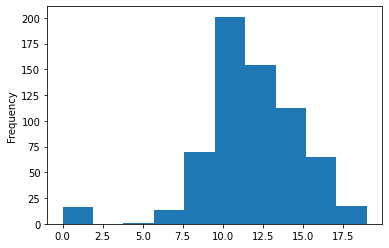

In [11]:
df['G3'].plot.hist()

In [12]:
binned = pd.cut(df['G3'], 4, labels=['fail','passing','high','upper'])

In [13]:
df['G3'] = binned

In [14]:
df.to_csv('../data/encoded_student_por_binned.csv', index=False)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('G3', axis=1), df['G3'], random_state=42, stratify=df['G3'])

In [17]:
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)

In [18]:
train.to_csv('../data/binned_train.csv', index=False)
test.to_csv('../data/binned_test.csv', index=False)